In [1]:
from pathlib import PureWindowsPath
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Dataset/NewDoctorsPay.xlsx')



In [4]:
df

,Specialty,Annual Income,% Female,Feel Fairly Compensated,Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid,Overall Career Satisfaction,Satisfied Income,Would Choose Medicine Again,Would Choose the Same Specialty,Survey Respondents by Specialty
0,Orthopedics,443000,0.09,0.44,156000,0.53,0.44,0.49,0.65,0.03
1,Cardiology,410000,0.12,0.48,98000,0.54,0.48,0.58,0.57,0.03
2,Dermatology,381000,0.38,0.66,114000,0.65,0.66,0.53,0.74,0.01
3,Gastroenterology,380000,0.15,0.48,86000,0.57,0.48,0.61,0.60,0.02
4,Radiology,375000,0.17,0.58,73000,0.53,0.58,0.49,0.53,0.03
5,Urology,367000,0.07,0.42,57000,0.50,0.42,0.51,0.56,0.01
6,Anesthesiology,360000,0.21,0.55,44000,0.54,0.55,0.59,0.48,0.06
7,Plastic Surgery,355000,0.24,0.47,102000,0.51,0.47,0.47,0.58,0.01
8,Oncology,329000,0.26,0.55,84000,0.59,0.55,0.68,0.54,0.02
9,Emergency Medicine,322000,0.19,0.58,60000,0.57,0.60,0.66,0.44,0.06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Specialty                                                                    26 non-null     object 
 1   Annual Income                                                                26 non-null     int64  
 2   % Female                                                                     26 non-null     float64
 3   Feel Fairly Compensated                                                      26 non-null     float64
 4   Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid  26 non-null     int64  
 5   Overall Career Satisfaction                                                  26 non-null     float64
 6   Satisfied Income                            

In [6]:
df.isnull().sum()

Specialty                                                                      0
Annual Income                                                                  0
% Female                                                                       0
Feel Fairly Compensated                                                        0
Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid    0
Overall Career Satisfaction                                                    0
Satisfied Income                                                               0
Would Choose Medicine Again                                                    0
Would Choose the Same Specialty                                                0
Survey Respondents by Specialty                                                0
dtype: int64

In [7]:
le = LabelEncoder()
df['Specialty'] = le.fit_transform(df['Specialty'])
#df['Annual Income'] = le.fit_transform(df['Annual Income'])
df['Feel Fairly Compensated'] = le.fit_transform(df['Feel Fairly Compensated'])
df['Overall Career Satisfaction'] = le.fit_transform(df['Overall Career Satisfaction'])
df['Satisfied Income'] = le.fit_transform(df['Satisfied Income'])
df['Would Choose Medicine Again'] = le.fit_transform(df['Would Choose Medicine Again'])
df['Would Choose the Same Specialty'] = le.fit_transform(df['Would Choose the Same Specialty'])
df['Survey Respondents by Specialty'] = le.fit_transform(df['Survey Respondents by Specialty'])






In [8]:
df.describe()

,Specialty,Annual Income,% Female,Feel Fairly Compensated,Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid,Overall Career Satisfaction,Satisfied Income,Would Choose Medicine Again,Would Choose the Same Specialty,Survey Respondents by Specialty
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,12.500000,297423.076923,0.269231,5.153846,70346.153846,6.307692,5.269231,9.923077,9.653846,2.269231
std,7.648529,71044.872061,0.121784,3.120158,29090.125208,3.518741,3.317321,5.830424,5.635192,2.764890
min,0.000000,204000.000000,0.070000,0.000000,36000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.250000,228000.000000,0.192500,2.250000,49000.000000,4.000000,2.250000,5.250000,6.250000,0.000000
50%,12.500000,293500.000000,0.255000,5.000000,60000.000000,6.000000,5.000000,10.500000,8.500000,1.000000
75%,18.750000,358750.000000,0.357500,7.750000,85500.000000,8.750000,7.750000,15.000000,13.750000,3.750000
max,25.000000,443000.000000,0.550000,11.000000,156000.000000,13.000000,12.000000,19.000000,20.000000,9.000000


In [9]:
df.drop(columns=["% Female","Difference in Earnings between Physicians who Feels Fairly vs Unfairly Paid"],axis=1,inplace=True)

In [10]:
df.describe()

,Specialty,Annual Income,Feel Fairly Compensated,Overall Career Satisfaction,Satisfied Income,Would Choose Medicine Again,Would Choose the Same Specialty,Survey Respondents by Specialty
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,12.500000,297423.076923,5.153846,6.307692,5.269231,9.923077,9.653846,2.269231
std,7.648529,71044.872061,3.120158,3.518741,3.317321,5.830424,5.635192,2.764890
min,0.000000,204000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.250000,228000.000000,2.250000,4.000000,2.250000,5.250000,6.250000,0.000000
50%,12.500000,293500.000000,5.000000,6.000000,5.000000,10.500000,8.500000,1.000000
75%,18.750000,358750.000000,7.750000,8.750000,7.750000,15.000000,13.750000,3.750000
max,25.000000,443000.000000,11.000000,13.000000,12.000000,19.000000,20.000000,9.000000


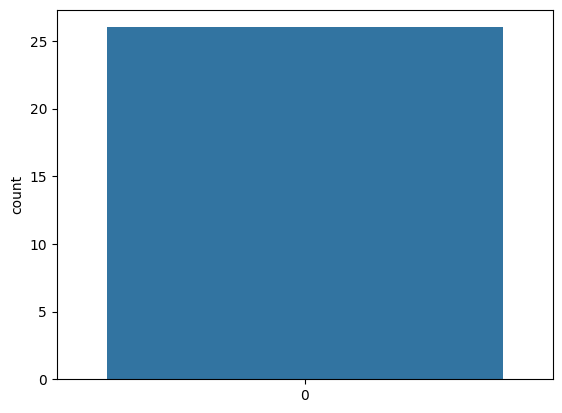

In [11]:
sns.countplot(df['Annual Income'])
plt.show()

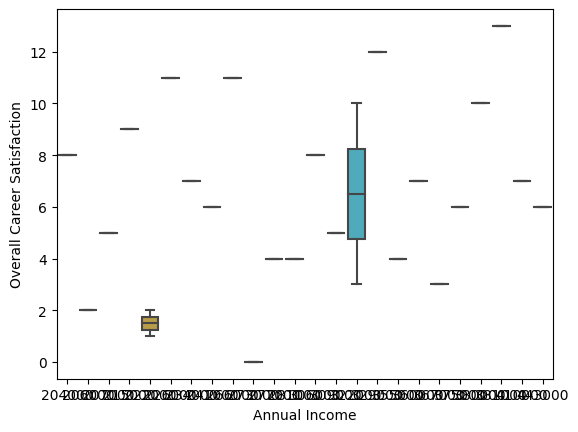

In [12]:
sns.boxplot(x='Annual Income',y='Overall Career Satisfaction',data=df)
plt.show()

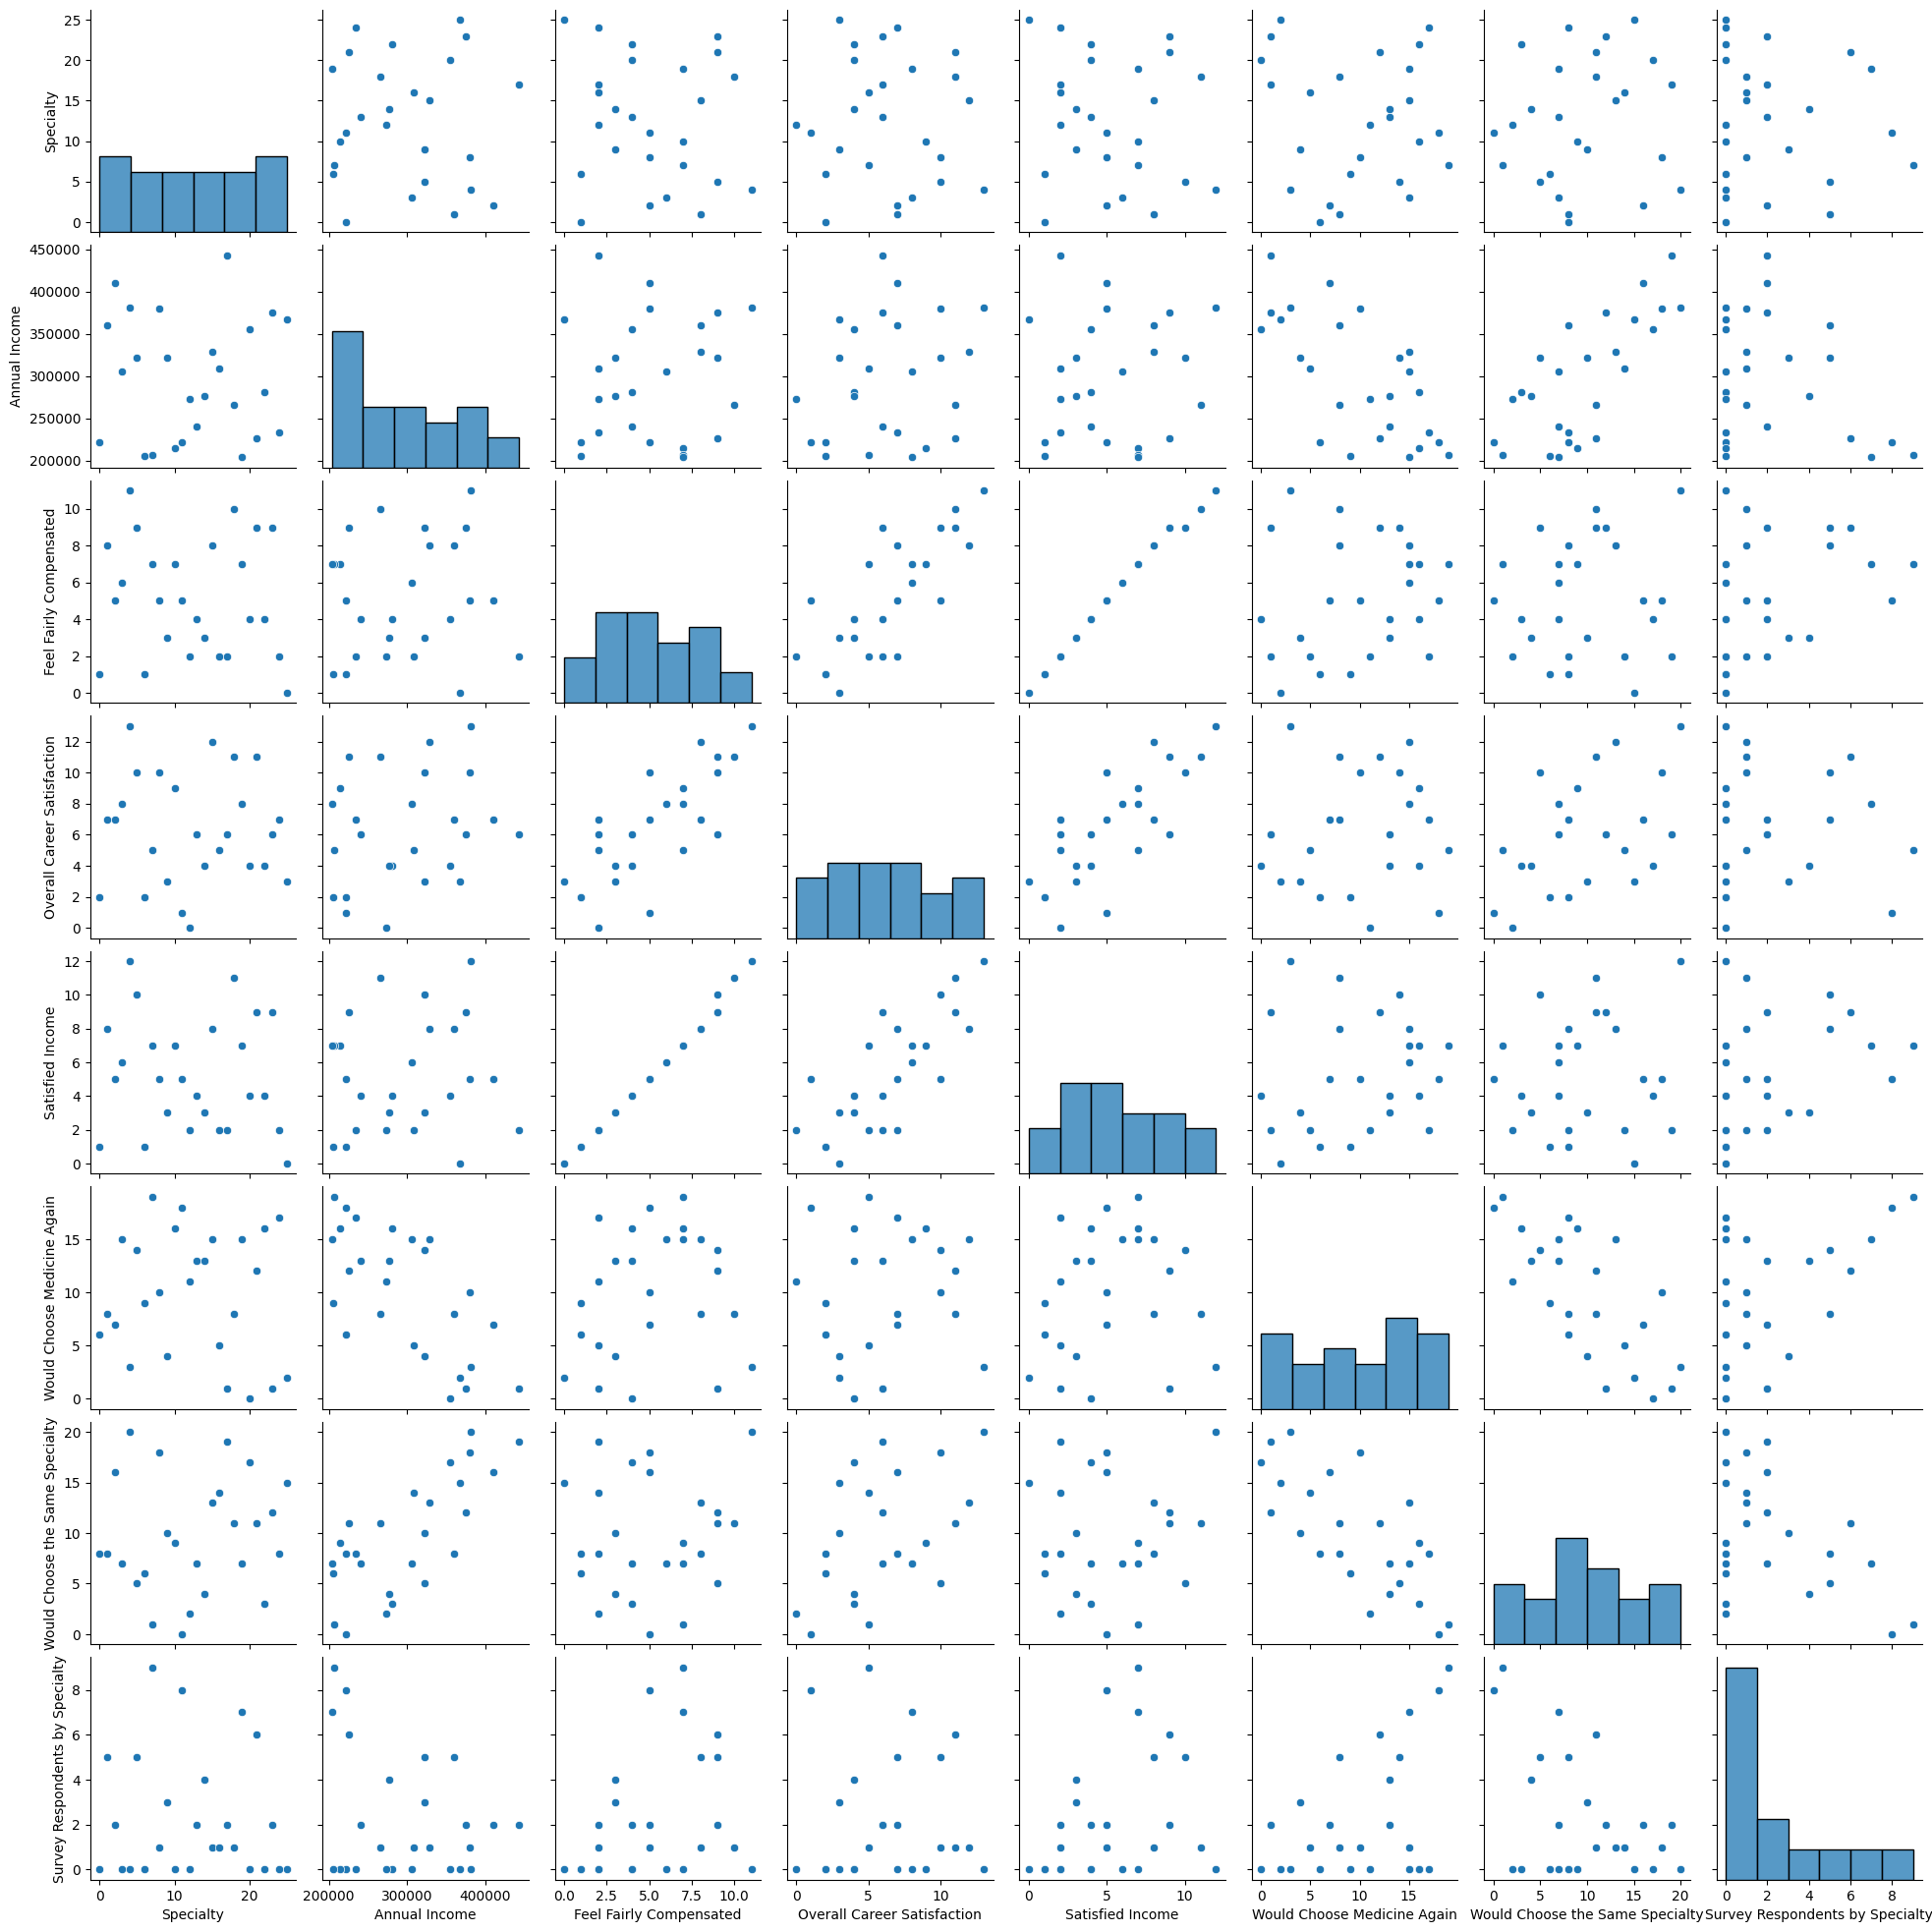

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
x = df.drop(['Annual Income'],axis=1)
y = df['Annual Income']

In [15]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()

In [19]:
reg.fit(x_train,y_train)

LinearRegression()

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [21]:
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

In [22]:
y_train_pred[:5]

array([208992.21158909, 336580.02502935, 381000.        , 263425.25831949,
       256673.14018389])

In [23]:
y_test_pred[:5]

array([279196.68196691, 286854.5193157 , 367767.14729714, 280119.45280465,
       326738.00154486])

In [24]:
# Accuracy For With Training Data Linear Regression

In [25]:
r2_score(y_train,y_train_pred) * 100

67.9954207297506

In [26]:
#Mean Square Error For Training Data

In [27]:
mean_squared_error(y_train,y_train_pred)

1405231186.3519106

In [28]:
#Accuracy For With Testing Data Linear Regression

In [29]:
r2_score(y_test,y_test_pred)*100

27.269167796800918

In [30]:
#Mean Square Error For Testing Data

In [31]:
mean_squared_error(y_test,y_test_pred)

3715045452.169282

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [34]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

In [36]:
#Randomforest for training data


In [37]:
r2_score(y_train,y_train_pred)

0.8955265319033624

In [38]:
#mean square error for training the data with random forest regressor

In [39]:
mean_squared_error(y_train,y_train_pred)

458713655.5555556

In [40]:
#random forest for testing data


In [41]:
r2_score(y_test,y_test_pred)

0.289059314547212

In [42]:
#mean square error for testing data with random forest regressor

In [43]:
mean_squared_error(y_test,y_test_pred)

3631440587.5

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
dtr=DecisionTreeRegressor(random_state=42)

In [46]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
y_train_pred=dtr.predict(x_train)

In [48]:
y_test_pred=dtr.predict(x_test)

In [49]:
y_train_pred[:5]

array([207000., 367000., 381000., 306000., 273000.])

In [50]:
y_test_pred[:5]

array([375000., 215000., 355000., 306000., 355000.])

In [51]:
#decision tree for training data

In [52]:
r2_score(y_train,y_train_pred)*100

100.0

In [53]:
#mean square error for training data with decision tree regressor

In [54]:
mean_squared_error(y_train,y_train_pred)

0.0

In [55]:
#decision tree for testing data

In [56]:
r2_score(y_test,y_test_pred)*100

30.204216476806934

In [57]:
#mean square error for testing data withdecision tree regressor

In [58]:
mean_squared_error(y_test,y_test_pred)

3565125000.0

In [59]:
import xgboost as xgb

In [60]:
xg_reg=xgb.XGBRegressor()

In [61]:
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [62]:
y_train_pred=xg_reg.predict(x_train)
y_test_pred=xg_reg.predict(x_test)

In [63]:
#accuracy for with training data XGBoost regressor

In [64]:
r2_score(y_train,y_train_pred)*100

99.99999999996973

In [65]:
#mean square error for training data

In [66]:
mean_squared_error(y_train,y_train_pred)

0.0013292100694444445

In [67]:
#accuracy for testing data XGBoost regressor

In [68]:
r2_score(y_test,y_test_pred)*100

30.178970363928848

In [69]:
#mean square error for testing data with XGB boost regressor

In [70]:
mean_squared_error(y_test,y_test_pred)

3566414555.666992

In [71]:
r2_score(y_train,y_train_pred)*100

99.99999999996973

In [72]:
reg.predict([[11,5,1,5,18,0,1]])

array([229413.33760417])

In [73]:
reg.predict([[23,9,6,9,1,12,4]])

array([351924.34431502])

In [74]:
reg.predict([[10,7,9,7,16,9,0]])

array([266779.67041667])

In [75]:
reg.predict([[17,2,6,2,1,19,4]])

array([363781.01296222])

In [76]:
reg.predict([[25,0,3,0,2,15,0]])

array([336580.02502935])

In [77]:
reg.predict([[19,7,8,7,15,7,9]])

array([234420.021642])

In [78]:
reg.predict([[11,5,1,5,18,0,1]])

array([229413.33760417])

In [79]:
reg.predict([[23,9,6,9,1,12,4]])

array([351924.34431502])

In [80]:
reg.predict([[10,7,9,7,16,9,0]])

array([266779.67041667])

In [81]:
reg.predict([[17,2,6,2,1,19,4]])

array([363781.01296222])

In [84]:
import pickle

In [85]:
with open("Doctors Salary Prediction.pkl","wb") as f:
  pickle.dump(reg,f)